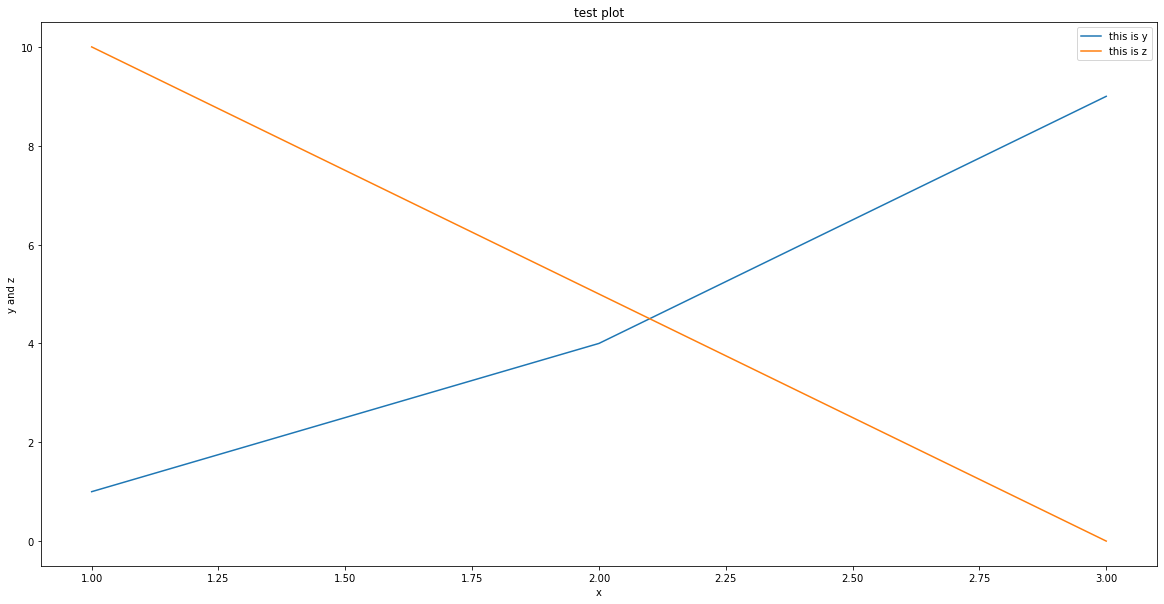

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
from pylab import rcParams
rcParams['figure.figsize']=20, 10
rcParams['agg.path.chunksize'] = 10000

from sklearn.preprocessing import MinMaxScaler

# Local Data Source #
#df = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv', nrows=500)

# Online Data Source #
#RawData = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv')

#print(df.head())

x = [1, 2, 3]
y = [1, 4, 9]
z = [10, 5, 0]
plt.plot(x, y)
plt.plot(x, z)
plt.title("test plot")
plt.xlabel("x")
plt.ylabel("y and z")
plt.legend(["this is y", "this is z"])
plt.show()



In [7]:
RawData = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [8]:
RawData

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,ZWE,Africa,Zimbabwe,2021-01-06,17804.0,610.0,597.000,431.0,13.0,10.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59315,ZWE,Africa,Zimbabwe,2021-01-07,18675.0,871.0,686.857,446.0,15.0,11.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59316,ZWE,Africa,Zimbabwe,2021-01-08,19660.0,985.0,796.571,468.0,22.0,14.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
59317,ZWE,Africa,Zimbabwe,2021-01-09,20499.0,839.0,858.286,483.0,15.0,15.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


In [9]:
type(RawData)

pandas.core.frame.DataFrame

In [10]:
type(RawData.iso_code)

pandas.core.series.Series

In [9]:
RawData.iso_code

0        AFG
1        AFG
2        AFG
3        AFG
4        AFG
        ... 
58355    ZWE
58356    ZWE
58357    ZWE
58358    ZWE
58359    ZWE
Name: iso_code, Length: 58360, dtype: object

In [11]:
RawData.iso_code.iloc[500]

'ALB'

In [13]:
plt.show()

In [15]:
tr = RawData[RawData.iso_code == 'TUR']

In [16]:
tr

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
54490,TUR,Asia,Turkey,2020-03-11,1.0,1.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54491,TUR,Asia,Turkey,2020-03-12,1.0,0.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54492,TUR,Asia,Turkey,2020-03-13,5.0,4.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54493,TUR,Asia,Turkey,2020-03-14,5.0,0.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54494,TUR,Asia,Turkey,2020-03-15,6.0,1.0,NaN,NaN,NaN,NaN,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54791,TUR,Asia,Turkey,2021-01-06,2283931.0,13830.0,12808.429,22070.0,191.0,204.000,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54792,TUR,Asia,Turkey,2021-01-07,2296102.0,12171.0,12492.857,22264.0,194.0,197.571,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54793,TUR,Asia,Turkey,2021-01-08,2307581.0,11479.0,12389.429,22450.0,186.0,193.857,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791
54794,TUR,Asia,Turkey,2021-01-09,2317118.0,9537.0,12154.714,22631.0,181.0,190.857,...,25129.341,0.2,171.285,12.13,14.1,41.1,NaN,2.81,77.69,0.791


In [20]:
RawData

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58355,ZWE,Africa,Zimbabwe,2021-01-01,14084.0,217.0,172.000,369.0,6.0,4.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58356,ZWE,Africa,Zimbabwe,2021-01-02,14491.0,407.0,218.286,377.0,8.0,5.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58357,ZWE,Africa,Zimbabwe,2021-01-03,15265.0,774.0,312.571,380.0,3.0,4.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
58358,ZWE,Africa,Zimbabwe,2021-01-04,15829.0,564.0,383.000,384.0,4.0,4.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


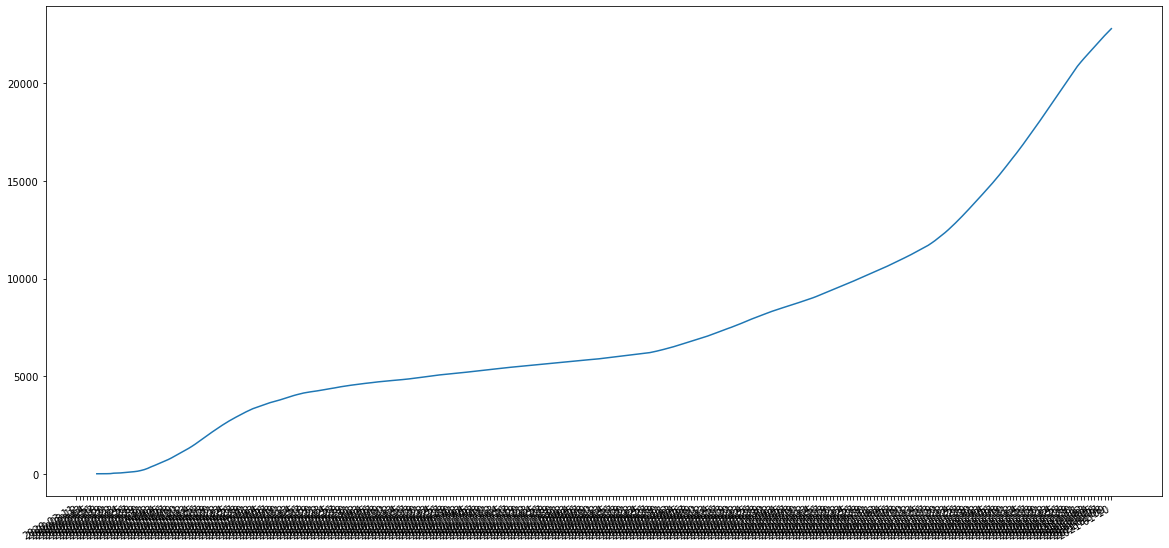

In [19]:
fig, ax = plt.subplots()
ax.plot(tr.date,tr.total_deaths)
myFmt = DateFormatter("%Y")
fig.autofmt_xdate()
plt.show()

In [20]:
usa = RawData[RawData.iso_code == 'USA']

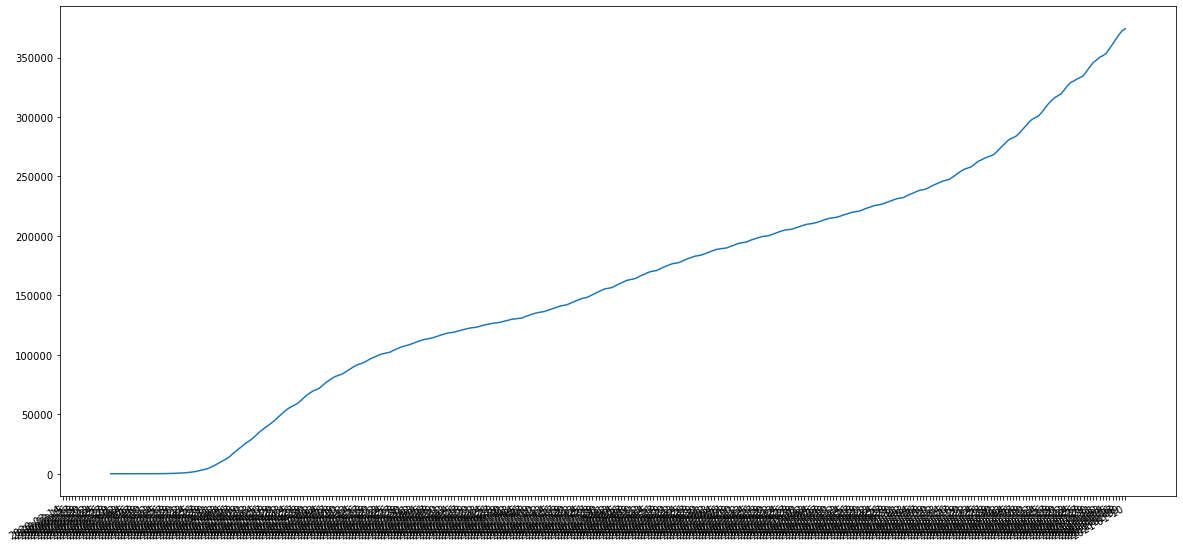

In [23]:
fig, ax = plt.subplots()
ax.plot(usa.date,usa.total_deaths)
myFmt = DateFormatter("%m")
fig.autofmt_xdate()
plt.show()

In [24]:
import seaborn as sns

In [26]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
X_iris=iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [28]:
y_iris=iris['species']
y_iris.shape

(150,)

In [29]:
rng = np.random.RandomState(42)

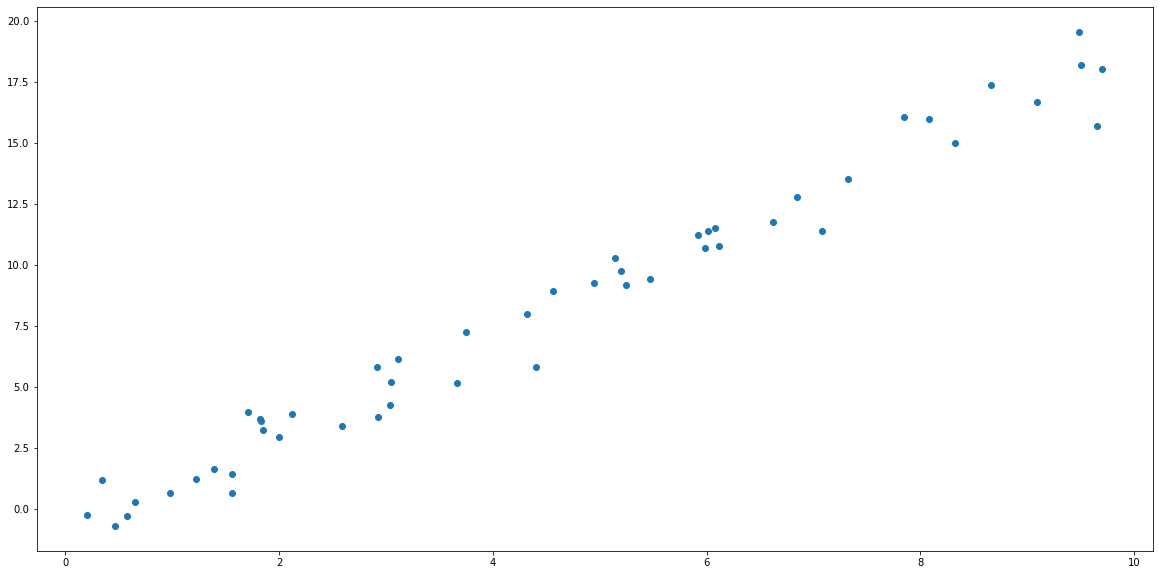

In [30]:
x=10*rng.rand(50)
y=2*x-1+rng.randn(50)
plt.scatter(x,y)

In [31]:
from sklearn.linear_model import LinearRegression

In [34]:
model=LinearRegression(fit_intercept=True)
model

LinearRegression()

In [35]:
X = x[:,np.newaxis]
X.shape

(50, 1)

In [36]:
model.fit(X,y)

LinearRegression()

In [37]:
model.coef_

array([1.9776566])

In [38]:
model.intercept_

-0.9033107255311164

In [39]:
x_fit=np.linspace(-1,11)
X_fit=x_fit[:,np.newaxis]
y_fit=model.predict(X_fit)

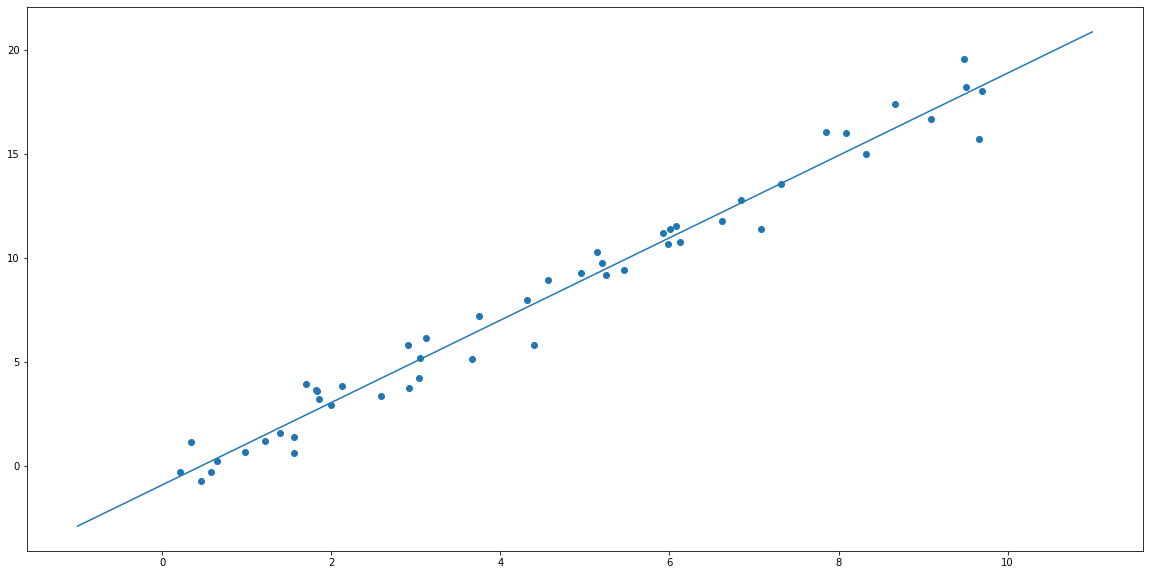

In [40]:
plt.scatter(x,y)
plt.plot(x_fit,y_fit)

In [41]:
from sklearn.model_selection import train_test_split
X_egitim, X_test, y_egitim, y_test = train_test_split(X_iris, y_iris, random_state = 1)

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
model = GaussianNB()

In [44]:
model.fit(X_egitim, y_egitim)

GaussianNB()

In [45]:
y_model = model.predict (X_test)

In [46]:
from sklearn.metrics import accuracy_score


In [48]:
accuracy_score(y_test, y_model)

0.9736842105263158

In [51]:
from sklearn.decomposition import PCA

In [52]:
model = PCA(n_components = 2)

In [53]:
model.fit(X_iris)

PCA(n_components=2)

In [54]:
X_2D = model.transform(X_iris)

In [55]:
iris['PCA1'] = X_2D[:,0]
iris['PCA2'] = X_2D[:,1]

In [56]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


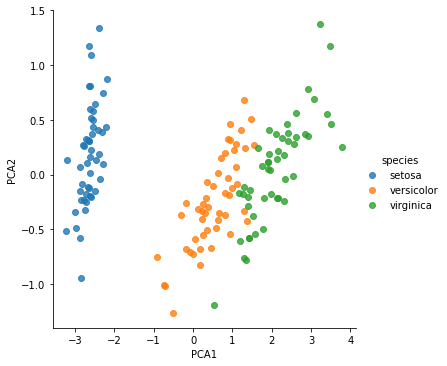

In [57]:
sns.lmplot('PCA1','PCA2', hue = 'species', data = iris, fit_reg=False)

In [58]:
from sklearn.mixture import GaussianMixture

In [59]:
model = GaussianMixture(n_components= 3, covariance_type = 'full')

In [60]:
model.fit(X_iris)

GaussianMixture(n_components=3)

In [61]:
y_gmm = model.predict(X_iris)

In [62]:
iris['kumeleme'] = y_gmm

In [63]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,kumeleme
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


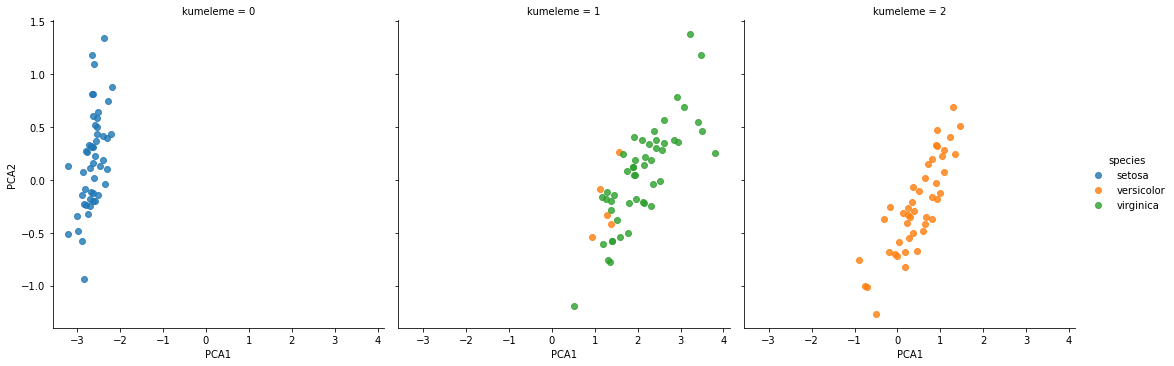

In [64]:
sns.lmplot('PCA1','PCA2', hue = 'species', data = iris, col = 'kumeleme', fit_reg=False)

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

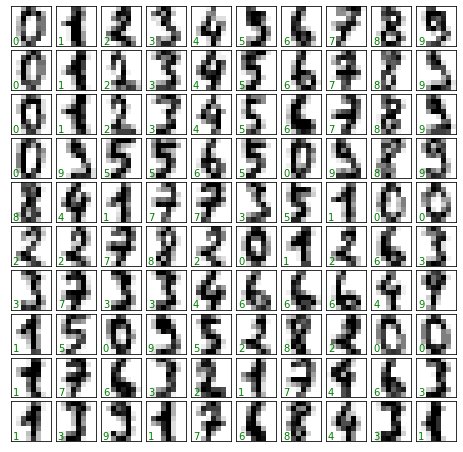

In [66]:
fig, axes = plt.subplots(10,10, figsize=(8,8), subplot_kw = {'xticks':[], 'yticks':[]}, gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green' )

In [67]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [68]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(X)

Isomap()

In [69]:
data_2 = iso.transform(X)
data_2.shape

(1797, 2)

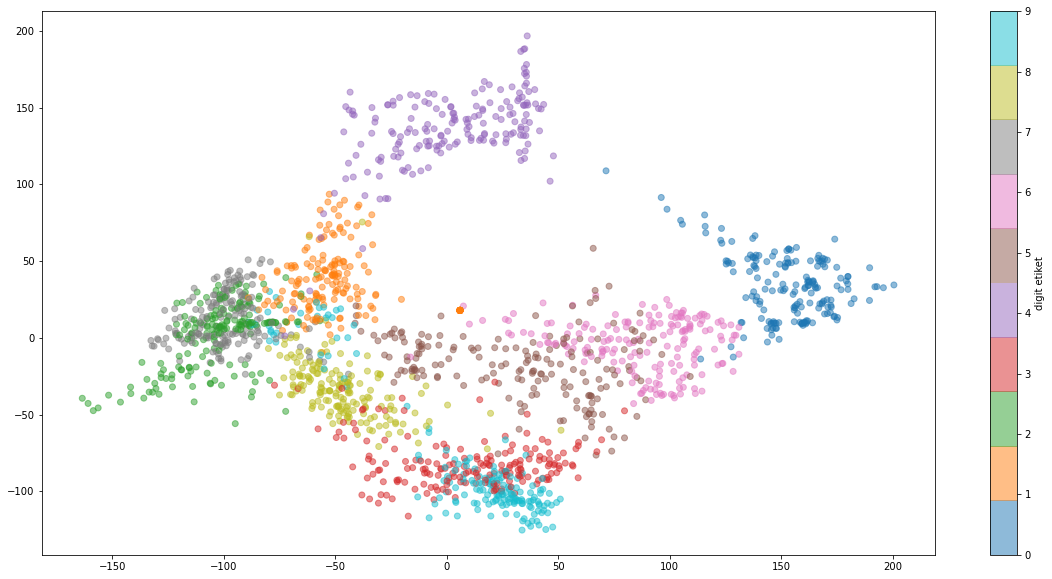

In [70]:
plt.scatter(data_2[:,0], data_2[:,1], c= digits.target, alpha = 0.5,
           cmap = plt.cm.get_cmap('tab10',10))
plt.colorbar(label = 'digit etiket', ticks = range(10) )

In [71]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X,y, random_state = 0)
model = GaussianNB()
model.fit(X_egitim, y_egitim)

GaussianNB()

In [72]:
y_model = model.predict(X_test)

In [73]:
accuracy_score(y_test,y_model)

0.8333333333333334

Text(445.20000000000005, 0.5, 'Gerçek Değer')

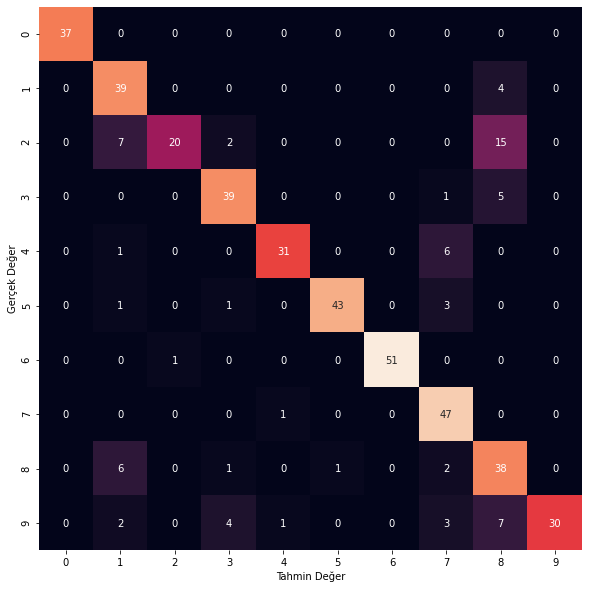

In [75]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('Tahmin Değer')
plt.ylabel('Gerçek Değer')

In [2]:
sınıf = [{'not': 90, 'kardes': 4, 'ders': 'mat'},
         {'not': 70, 'kardes': 3, 'ders': 'ing'},
         {'not': 65, 'kardes': 3, 'ders': 'mat'},
         {'not': 60, 'kardes': 2, 'ders': 'fiz'}
        ]

In [4]:
from sklearn.feature_extraction import DictVectorizer

In [5]:
vek = DictVectorizer(sparse = False, dtype = int)
vek.fit_transform(sınıf)

array([[ 0,  0,  1,  4, 90],
       [ 0,  1,  0,  3, 70],
       [ 0,  0,  1,  3, 65],
       [ 1,  0,  0,  2, 60]])

In [6]:
vek.get_feature_names()

['ders=fiz', 'ders=ing', 'ders=mat', 'kardes', 'not']

In [7]:
vek = DictVectorizer(sparse = True, dtype = int)

In [8]:
vek.fit_transform(sınıf)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

In [9]:
veri = ['hava iyi',
        'iyi insan',
        'hava bozuk']

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
vek = CountVectorizer()
X = vek.fit_transform(veri)
X

<3x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [13]:
import pandas as pd

In [14]:
pd.DataFrame(X.toarray(), columns = vek.get_feature_names())

,bozuk,hava,insan,iyi
0,0,1,0,1
1,0,0,1,1
2,1,1,0,0


In [15]:
import numpy as np
import matplotlib.pyplot as plt

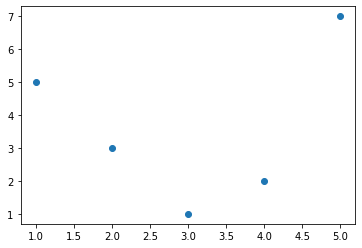

In [16]:
x = np.array([1,2,3,4,5])
y = np.array ([5,3,1,2,7])
plt.scatter(x,y)

In [17]:
from sklearn.linear_model import LinearRegression

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


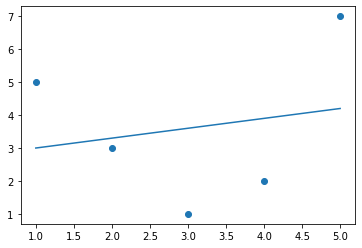

In [18]:
X = x[:, np.newaxis]
model = LinearRegression().fit(X,y)
y_fit = model.predict(X)
plt.scatter(x,y)
plt.plot(x,y_fit)

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
pol = PolynomialFeatures(degree = 3, include_bias = False)
X2 = pol.fit_transform(X)
X2

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [21]:
model = LinearRegression().fit(X2, y)

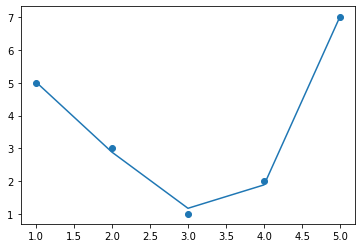

In [22]:
y_fit = model.predict(X2)
plt.scatter(x,y)
plt.plot(x, y_fit)

In [24]:
from numpy import nan
X = np.array([[1,nan,3],
            [5,6,9],
            [4,5,2],
            [4,6,nan],
            [9,8,1]])
y = np.array ([10,13,-2,7,-6])

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


array([[1.  , 6.25, 3.  ],
       [5.  , 6.  , 9.  ],
       [4.  , 5.  , 2.  ],
       [4.  , 6.  , 3.75],
       [9.  , 8.  , 1.  ]])

In [28]:
model = LinearRegression().fit(X2,y)
model.predict(X2)

array([10.59852491, 13.45464873, -1.31399837,  4.99263952, -5.7318148 ])

In [29]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy = 'mean'),
                      PolynomialFeatures(degree = 2),
                      LinearRegression())

In [30]:
model.fit(X,y)
print(y)
print(model.predict(X))

[10 13 -2  7 -6]
[10. 13. -2.  7. -6.]


In [32]:
import mglearn

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


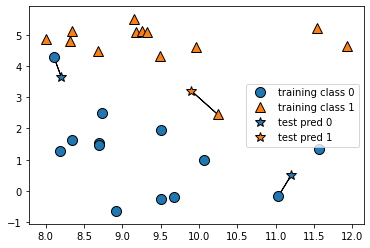

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


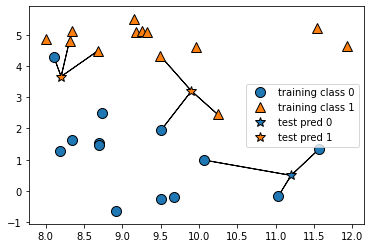

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [35]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
cls = KNeighborsClassifier(n_neighbors = 3)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [36]:
cls.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
cls.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [38]:
cls.score(X_test, y_test)

0.8571428571428571

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [42]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [43]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [48]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target, random_state = 66)

In [49]:
train_correctness = []
test_correctness = []
neighbors_number = range(1,11)

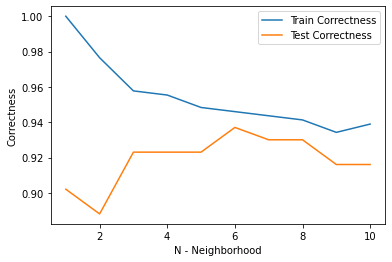

In [50]:
for i in neighbors_number:
    cls = KNeighborsClassifier(n_neighbors = i)
    cls.fit(X_train, y_train)
    train_correctness.append(cls.score(X_train, y_train))
    test_correctness.append(cls.score(X_test, y_test))
plt.plot(neighbors_number, train_correctness, label = 'Train Correctness')
plt.plot(neighbors_number, test_correctness, label = 'Test Correctness')
plt.ylabel('Correctness')
plt.xlabel('N - Neighborhood')
plt.legend()

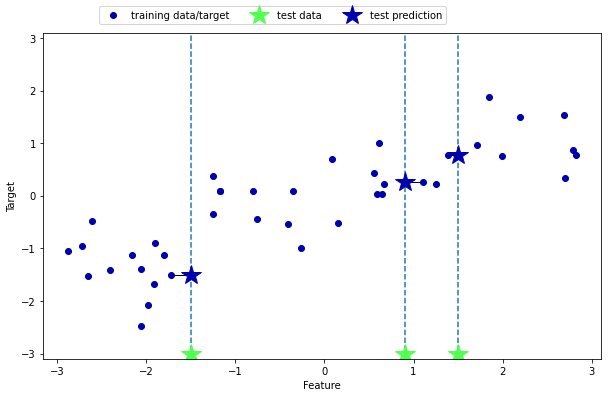

In [51]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

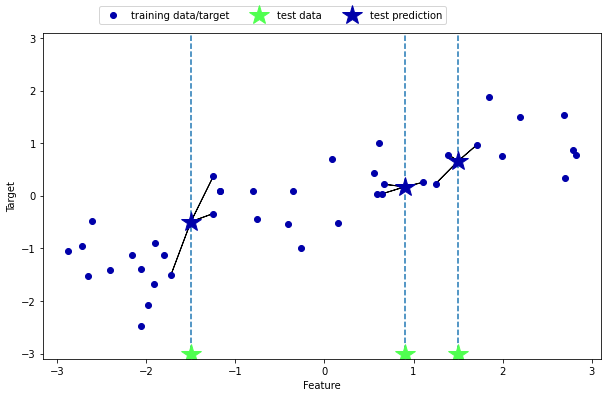

In [52]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [54]:
reg.score(X_test,y_test)

0.8344172446249605

In [1]:
import mglearn

w[0]: 0.393906  b: -0.031804


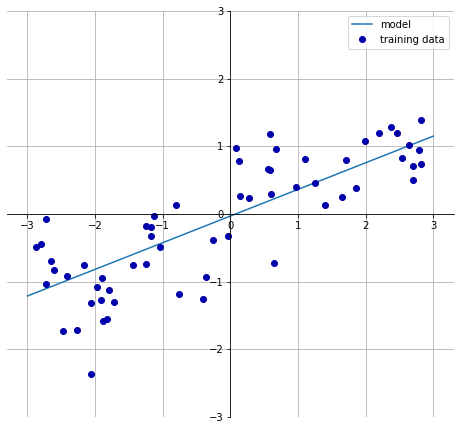

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
X,y = mglearn.datasets.make_wave(n_samples=60)
from sklearn.model_selection import train_test_split

In [6]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, random_state = 42)

In [7]:
LR = LinearRegression().fit(X_egitim, y_egitim)

In [8]:
print(LR.coef_)

[0.39390555]


In [10]:
print(LR.intercept_)

-0.031804343026759746


In [12]:
print(LR.score(X_egitim, y_egitim))

0.6700890315075756


In [13]:
print(LR.score(X_test, y_test))

0.65933685968637


In [14]:
from sklearn.datasets import load_boston
boston = load_boston()

In [16]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
X, y = mglearn.datasets.load_extended_boston()


In [20]:
X.shape

(506, 104)

In [21]:
y.shape

(506,)

In [23]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X,y,random_state = 0)
LR = LinearRegression().fit(X_egitim, y_egitim)

In [26]:
print(LR.score(X_egitim, y_egitim))
print(LR.score(X_test, y_test)) # overfit

0.9520519609032729
0.607472195966585


In [28]:
import pandas as pd

In [30]:
data = pd.read_csv('student-mat.csv', sep=';')

In [32]:
data = data[['G1', 'G2', 'G3', 'studytime','failures','absences','age']]

In [34]:
data.head()

,G1,G2,G3,studytime,failures,absences,age
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [53]:
data.rename( columns = {'G1': 'Not1',
                        'G2': 'Not2',
                        'G3': 'Final',
                        'studytime':'Calisma_suresi',
                        'failures':'Sinif_tekrari',
                        'absences':'Devamsizlik',
                        'age':'Yas'},
                        inplace = True
)

In [54]:
data.head()

,Not1,Not2,Not3,Calisma_suresi,Sinif_tekrari,Devamsizlik,yas
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [52]:
data.dtypes

Not1              int64
Not2              int64
Not3              int64
Calisma_suresi    int64
Sinif_tekrari     int64
Devamsizlik       int64
yas               int64
dtype: object

In [55]:
import numpy as np
y = np.array(data['Not3'])
X = np.array(data.drop('Not3', axis = 1))

In [56]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
linear = LinearRegression()

In [57]:
linear.fit(X_egitim, y_egitim)

LinearRegression()

In [58]:
linear.score(X_test, y_test) # test > egitim doğruluksa underfit, egitim > test doğruluksa overfit

0.8325898318712225

In [59]:
linear.score (X_egitim, y_egitim) 

0.8261275475197141

In [61]:
print('Katsayıları: \n', linear.coef_)
print('Sabit: \n', linear.intercept_)
data.head()

Katsayıları: 
 [ 0.19575962  0.95558174 -0.24215827  0.12730705  0.03566925 -0.23224281]
Sabit: 
 2.154909740675155


,Not1,Not2,Not3,Calisma_suresi,Sinif_tekrari,Devamsizlik,yas
0,5,6,6,2,0,6,18
1,5,5,6,2,0,4,17
2,7,8,10,2,3,10,15
3,15,14,15,3,0,2,15
4,6,10,10,2,0,4,16


In [62]:
new_data = np.array([[10,14,3,0,4,16]])
linear.predict(new_data)

array([13.19096755])

In [63]:
new_data_2 = np.array([[15,14,3,0,2,15]])
linear.predict(new_data_2)

array([14.33066999])

In [65]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [66]:
X,y = mglearn.datasets.load_extended_boston()

In [67]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X,y, random_state = 0)

In [68]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_egitim, y_egitim)

In [69]:
print(ridge.score(X_egitim, y_egitim))
print(ridge.score(X_test, y_test))

0.885796658517094
0.7527683481744754


In [70]:
ridge10 = Ridge(alpha=10).fit(X_egitim, y_egitim)
print(ridge10.score(X_test, y_test))

0.6359411489177311


In [71]:
print(ridge10.score(X_egitim, y_egitim))

0.7882787115369615


In [73]:
ridge01 = Ridge(alpha=0.1).fit(X_egitim, y_egitim)
print(ridge01.score(X_test, y_test))
print(ridge01.score(X_egitim, y_egitim))

0.772206793647982
0.9282273685001986


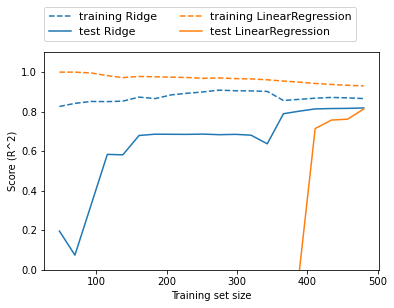

In [74]:
mglearn.plots.plot_ridge_n_samples()

In [75]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_egitim, y_egitim)

In [76]:
print(lasso.score(X_test, y_test))
print(lasso.score(X_egitim, y_egitim))

0.20937503255272294
0.29323768991114607


In [77]:
np.sum(lasso.coef_ != 0)

4

In [84]:
lasso001 = Lasso(alpha =0.01, max_iter=100000).fit(X_egitim, y_egitim)

In [85]:
print(lasso001.score(X_test, y_test))
print(lasso001.score(X_egitim, y_egitim))

0.7656571174549983
0.8962226511086497


In [87]:
lasso00001 = Lasso(alpha =0.0001, max_iter=100000).fit(X_egitim, y_egitim)

In [88]:
print(lasso00001.score(X_test, y_test))
print(lasso00001.score(X_egitim, y_egitim)) #attr azsa lasso, attr çoksa ridge

0.6437467421272709
0.9507158754515467


In [2]:
from sklearn.datasets import load_breast_cancer
exdata = load_breast_cancer()
from sklearn.model_selection import train_test_split


In [4]:
X_train, X_test, y_train, y_test = train_test_split(exdata.data, exdata.target, stratify = exdata.target, random_state = 42)

In [5]:
from sklearn.linear_model import LogisticRegression

In [7]:
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [8]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9553990610328639
0.958041958041958


In [9]:
logreg100 = LogisticRegression(C=100 ,solver='liblinear').fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.971830985915493
0.965034965034965


In [10]:
logreg001 = LogisticRegression(C=0.01 ,solver='liblinear').fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9342723004694836
0.9300699300699301


In [13]:
for  C, market in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(penalty='l1', max_iter = 1000,solver='liblinear', C=C).fit(X_train,y_train)
    print('C={:.3f} için train doğruluk {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('C={:.3f} için test doğruluk {:.2f}'.format(C, lr_l1.score(X_test, y_test)))    

C=0.001 için train doğruluk 0.91
C=0.001 için test doğruluk 0.92
C=1.000 için train doğruluk 0.96
C=1.000 için test doğruluk 0.96
C=100.000 için train doğruluk 0.99
C=100.000 için test doğruluk 0.98


In [14]:
from sklearn.datasets import make_blobs
import mglearn

In [15]:
%matplotlib inline

In [16]:
X, y = make_blobs(random_state = 42)

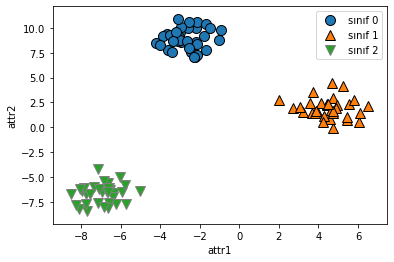

In [17]:
import matplotlib.pyplot as plt
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('attr1')
plt.ylabel('attr2')
plt.legend(['sınıf 0','sınıf 1', 'sınıf 2'])

In [18]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC().fit(X,y)
linear_svc.coef_

array([[-0.17492187,  0.23141156],
       [ 0.47621484, -0.06936551],
       [-0.18914314, -0.20399664]])

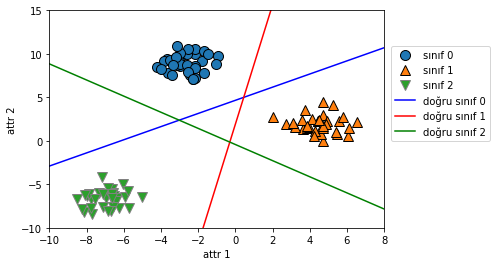

In [20]:
import numpy as np
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svc.coef_, linear_svc.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel('attr 1')
plt.ylabel('attr 2')
plt.legend(['sınıf 0', 'sınıf 1', 'sınıf 2','doğru sınıf 0', 'doğru sınıf 1', 'doğru sınıf 2'], loc = (1.02,0.4))

In [22]:
import pandas as pd
data = pd.read_csv('titanic.csv')

In [23]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [25]:
data.shape

(1310, 14)

In [26]:
data.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [27]:
import seaborn as sns


<AxesSubplot:xlabel='survived', ylabel='count'>

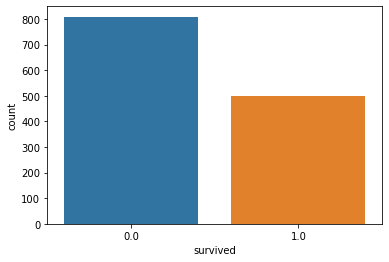

In [28]:
sns.countplot(x='survived', data = data)

<AxesSubplot:xlabel='survived', ylabel='count'>

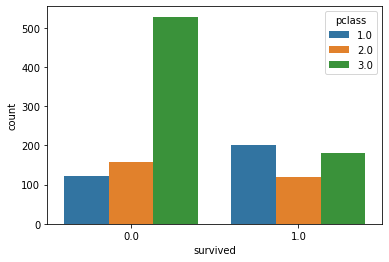

In [29]:
sns.countplot(x='survived', hue = 'pclass', data = data)

<AxesSubplot:xlabel='survived', ylabel='count'>

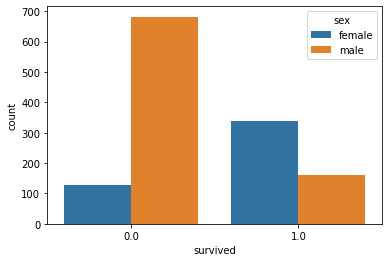

In [30]:
sns.countplot(x='survived', hue = 'sex', data = data)

<AxesSubplot:ylabel='Frequency'>

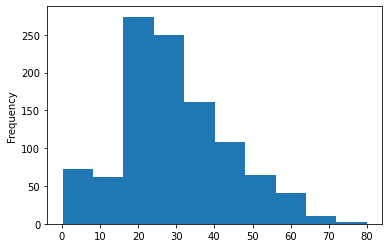

In [31]:
data['age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

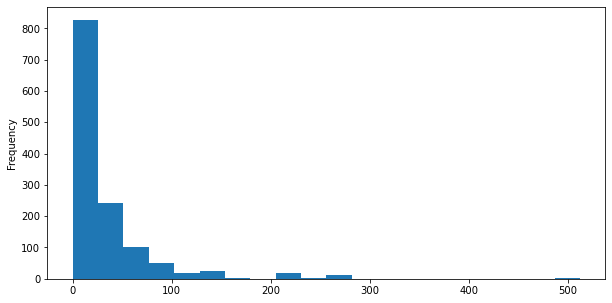

In [33]:
data['fare'].plot.hist(bins = 20, figsize=(10,5))

<AxesSubplot:xlabel='sibsp', ylabel='count'>

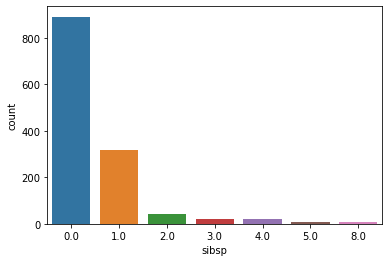

In [34]:
sns.countplot(x='sibsp', data = data)

In [36]:
data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:>

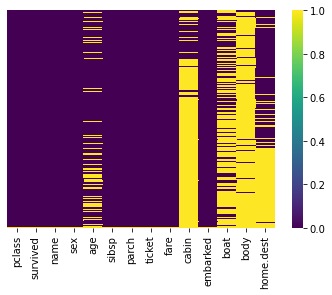

In [37]:
sns.heatmap(data.isnull(),yticklabels=False, cmap='viridis')

In [38]:
data.drop(['cabin','boat','body','home.dest'],axis=1,inplace=True)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


In [39]:
data.isnull().sum()

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [40]:
data.dropna(inplace=True)

In [41]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [42]:
data.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [43]:
sex = pd.get_dummies(data['sex'], drop_first=True)

In [44]:
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [45]:
data.embarked.value_counts()

S    781
C    212
Q     50
Name: embarked, dtype: int64

In [46]:
embarked = pd.get_dummies(data['embarked'], drop_first=True)
pclass = pd.get_dummies(data['pclass'], drop_first=True)

In [47]:
data.drop(['sex','embarked','pclass'], axis = 1, inplace=True)

In [48]:
data = pd.concat([data,sex,embarked,pclass], axis =1)

In [49]:
data.dtypes

survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male          uint8
Q             uint8
S             uint8
2.0           uint8
3.0           uint8
dtype: object

In [50]:
data.drop(['name', 'ticket'], axis=1, inplace=True)

In [51]:
data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [52]:
X = data.drop('survived', axis = 1)
y = data['survived']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 100) #test size kaç verinin teste kaç verinin traine gideceğini belirtir

In [54]:
from sklearn.linear_model import LogisticRegression

In [57]:
lg_model = LogisticRegression(max_iter=1000)

In [58]:
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
lg_model.score(X_test, y_test)

0.7701149425287356

In [61]:
lg_model.score(X_train, y_train)

0.8069053708439897

In [62]:
lg_model = LogisticRegression(C=0.1 ,max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [63]:
print(lg_model.score(X_test,y_test))
print(lg_model.score(X_train,y_train))

0.7816091954022989
0.7953964194373402


In [64]:
from sklearn.metrics import confusion_matrix
predict = lg_model.predict(X_test)
confusion_matrix(y_test, predict)

array([[124,  21],
       [ 36,  80]], dtype=int64)

In [65]:
data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0,0
1,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0,0
2,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0,0
3,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0,0
4,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0,0


In [68]:
new_data = np.array([[29,0,0,211.3375,0,0,1,0,0]])

In [69]:
lg_model.predict(new_data)

array([1.])

In [70]:
lg_model.coef_

array([[-0.03161631, -0.31966505,  0.06667471,  0.00648935, -1.80595628,
        -0.41778212, -0.37409133, -0.179301  , -1.02479201]])

In [71]:
new_data_2 = np.array([[30,1,1,150,0,0,1,0,0]])

In [72]:
lg_model.predict(new_data_2)

array([1.])

In [73]:
import seaborn as sns; sns.set()

In [74]:
%matplotlib inline

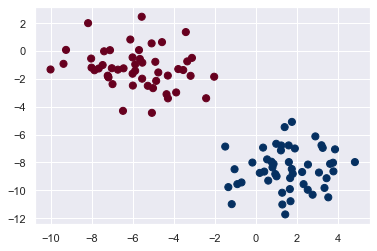

In [75]:
X, y = make_blobs(100,2,centers = 2, cluster_std = 1.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdBu')

In [76]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [77]:
rng = np.random.RandomState(0)
X_new = [-6, -14] + [14,18]* rng.rand(1000,2)
y_new = model.predict(X_new)

(-10.77112589766161, 5.565990705037111, -12.438164094826996, 3.175281881938451)

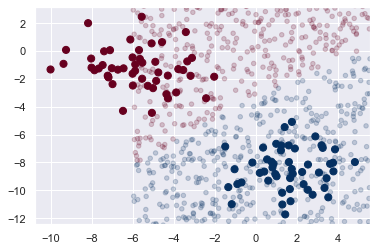

In [78]:
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, s=20, cmap='RdBu', alpha = 0.2)
plt.axis(lim)

In [79]:
from sklearn.datasets import fetch_20newsgroups

In [80]:
data = fetch_20newsgroups

In [81]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

In [85]:
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [84]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [88]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [89]:
etiketler = model.predict(test.data)

Text(89.133125, 0.5, 'Tahmin Etiketleri')

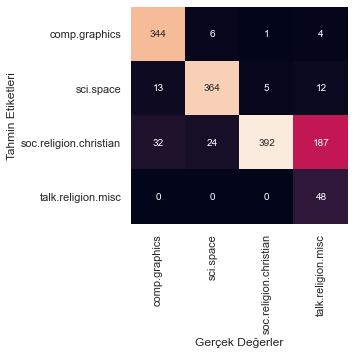

In [90]:
mat = confusion_matrix(test.target, etiketler)
sns.heatmap(mat.T, square = True, annot= True, fmt='d', cbar = False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Etiketleri')

In [91]:
def predict_category(s, train = train, model = model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [92]:
predict_category('discussing atheism')

'soc.religion.christian'

In [93]:
predict_category('determining the screen resolution')

'comp.graphics'

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples = 50, centers = 2, random_state=0, cluster_std=0.60)

In [4]:
%matplotlib inline

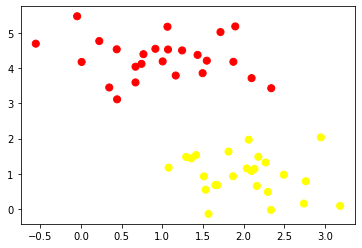

In [5]:
plt.scatter(X[:,0], X[:,1], c = y, s=50, cmap='autumn')

In [6]:
from sklearn.svm import SVC
model = SVC(kernel ='linear', C = 1E10)

In [7]:
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [10]:
from sklearn.datasets.samples_generator import make_circles

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
X,y = make_circles(100, factor = .1, noise = .1)
clf = SVC(kernel='linear').fit(X,y)

In [14]:
clf = SVC(kernel='rbf', C=1E6, gamma = 'auto').fit(X,y)

In [15]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state=0, cluster_std=1.2)

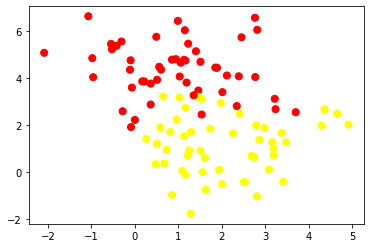

In [16]:
plt.scatter(X[:,0], X[:,1], c = y, s=50, cmap='autumn')

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [19]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 0)

In [20]:
svc = SVC(gamma='auto').fit(X_train, y_train)

In [23]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

1.0
0.6293706293706294


In [25]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train - min_on_training).max(axis=0)
X_train_scaled = (X_train - min_on_training)/range_on_training
X_test_scaled = (X_test - min_on_training)/range_on_training
svc = SVC(gamma = 'auto').fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9483568075117371
0.951048951048951


In [26]:
svc = SVC(C=1000 ,gamma = 'auto').fit(X_train_scaled, y_train)
print(svc.score(X_train_scaled, y_train))
print(svc.score(X_test_scaled, y_test))

0.9882629107981221
0.972027972027972


In [30]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify = data.target)

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9440559440559441


In [34]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [35]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9835680751173709
0.9440559440559441


In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,2:]
y = iris.target

In [37]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [44]:
from sklearn.tree import export_graphviz
export_graphviz(tree,
               out_file='tree_2.dot',
               feature_names = iris.feature_names[2:],
               class_names=True,
               filled = True)

In [45]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [46]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [48]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [51]:
log = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)
rnd = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)
svc = SVC(gamma='auto').fit(X_train, y_train)
voting = VotingClassifier(estimators=[('lr', log), ('rf', rnd), ('svc', svc)],
                         voting = 'hard').fit(X_train, y_train)
print(log.score(X_test, y_test))
print(rnd.score(X_test, y_test))
print(svc.score(X_test, y_test))
print(voting.score(X_test, y_test))

0.68
0.76
0.76
0.76


In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples=300, centers = 4, random_state=0, cluster_std=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [55]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
bag = BaggingClassifier(tree,
                       n_estimators=100,
                       max_samples=0.8,
                       n_jobs=-1,
                       random_state=1).fit(X_train, y_train)

In [54]:
print(tree.score(X_test, y_test))
print(bag.score(X_test, y_test))

0.9066666666666666
0.9066666666666666


In [56]:
X,y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y)

In [57]:
forest = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)

In [58]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target, random_state = 0)

In [59]:
forest = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
print(forest.score(X_test,y_test))

0.965034965034965


In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0).fit(X_train, y_train)
print(gbrt.score(X_test,y_test))
print(gbrt.score(X_train,y_train))

0.965034965034965
0.9882629107981221


In [66]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state=42)

In [68]:
mlp = MLPClassifier(hidden_layer_sizes=[10],max_iter = 10000, random_state=0).fit(X_train, y_train)

In [69]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [70]:
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.9389671361502347
0.916083916083916


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp = MLPClassifier(alpha = 1, max_iter =1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
print(mlp.score(X_train_scaled, y_train))
print(mlp.score(X_test_scaled, y_test))

0.9882629107981221
0.9790209790209791


In [75]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [76]:
X_train_scaled = scaler.transform(X_train)

In [77]:
X_train.min(axis=0)

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 5.024e-02, 1.153e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       9.539e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.566e-01, 5.521e-02])

In [78]:
X_train_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [80]:
X_train.max(axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 2.867e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.575e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 9.379e-01, 1.170e+00, 2.910e-01, 5.774e-01, 1.486e-01])

In [81]:
X_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [83]:
X_test_scaled = scaler.transform(X_test)

In [84]:
X_test_scaled.min(axis=0)

array([ 0.0336031 ,  0.0226581 ,  0.03144219,  0.01141039,  0.14128374,
        0.04406704,  0.        ,  0.        ,  0.1540404 , -0.00615249,
       -0.00137796,  0.00594501,  0.00430665,  0.00079567,  0.03919502,
        0.0112206 ,  0.        ,  0.        , -0.03191387,  0.00664013,
        0.02660975,  0.05810235,  0.02031974,  0.00943767,  0.1094235 ,
        0.02637792,  0.        ,  0.        , -0.00023764, -0.00182032])

In [85]:
X_test_scaled.max(axis=0)

array([0.9578778 , 0.81501522, 0.95577362, 0.89353128, 0.81132075,
       1.21958701, 0.87956888, 0.9333996 , 0.93232323, 1.0371347 ,
       0.42669616, 0.49765736, 0.44117231, 0.28371044, 0.48703131,
       0.73863671, 0.76717172, 0.62928585, 1.33685792, 0.39057253,
       0.89612238, 0.79317697, 0.84859804, 0.74488793, 0.9154725 ,
       1.13188961, 1.07008547, 0.92371134, 1.20532319, 1.63068851])

In [87]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 0)
svc = SVC(C=100, gamma = 'auto')
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

0.6293706293706294

In [88]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [89]:
svc.fit(X_train_scaled, y_train)
svc.score(X_test_scaled, y_test)

0.965034965034965

In [91]:
#PCA
import numpy as np
rng = np.random.RandomState(1)
X=np.dot(rng.rand(2,2), rng.randn(2,200)).T
X.shape

(200, 2)

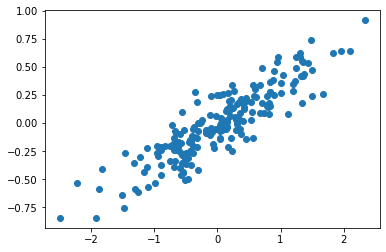

In [92]:
%matplotlib inline
plt.scatter(X[:,0], X[:,1])

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [94]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


In [95]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(X.shape)
print(X_pca.shape)

(200, 2)
(200, 1)


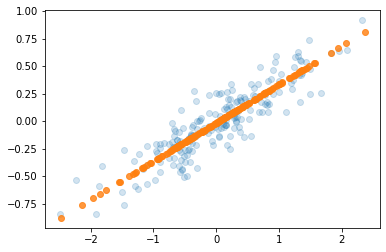

In [97]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1], alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8)

In [98]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [100]:
pca = PCA(2)
data_pca = pca.fit_transform(digits.data)
data_pca.shape

(1797, 2)

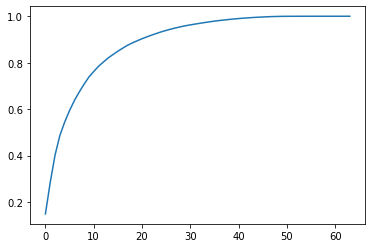

In [102]:
pca = PCA().fit(digits.data) # gerekli PCA. bayağı yararlı

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [1]:
from sklearn.datasets import load_digits 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
digits = load_digits()

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(digits.data)
digits_pca = pca.transform(digits.data)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


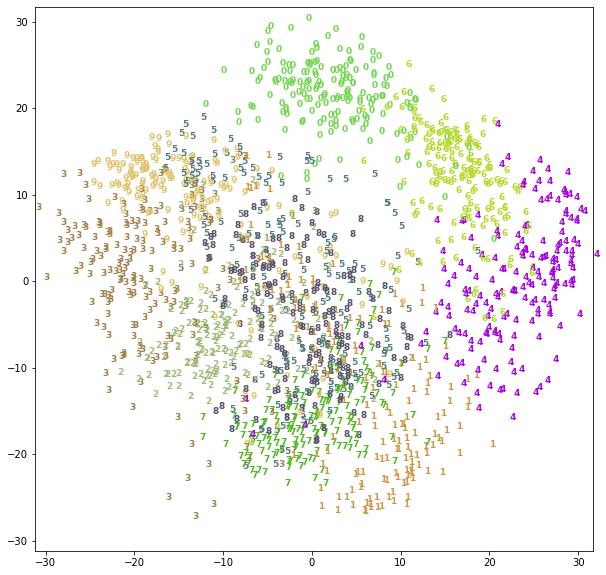

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ["#72d74f","#cf9a4c","#a0bc7b","#a28049","#a907e3","#567e7e","#b6d92b","#4eba20","#57526d", "#e1c46f"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,0].min(), digits_pca[:,0].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i],),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


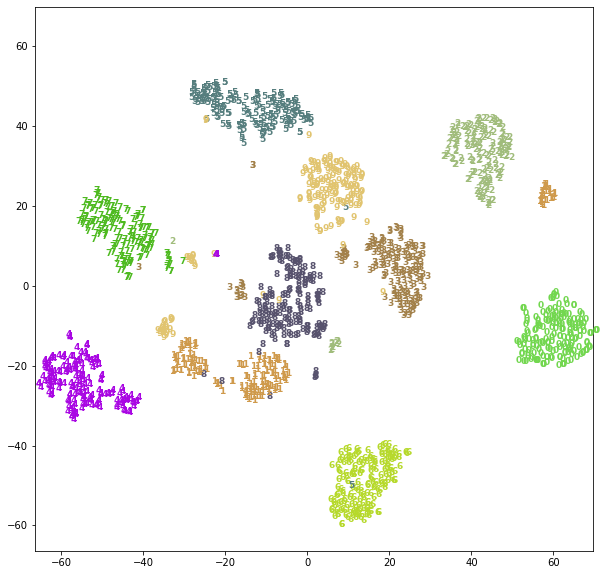

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
colors = ["#72d74f","#cf9a4c","#a0bc7b","#a28049","#a907e3","#567e7e","#b6d92b","#4eba20","#57526d", "#e1c46f"]
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,0].min(), digits_tsne[:,0].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i,1], str(digits.target[i],),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})

In [9]:
import mglearn

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


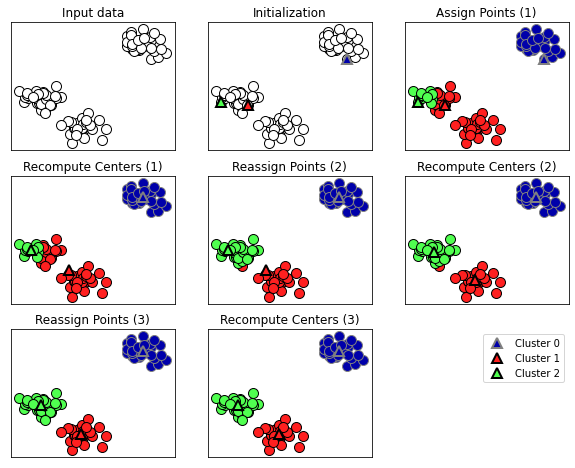

In [10]:
mglearn.plots.plot_kmeans_algorithm()

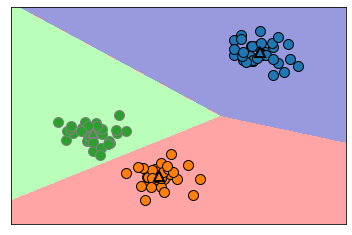

In [13]:
mglearn.plots.plot_kmeans_boundaries()

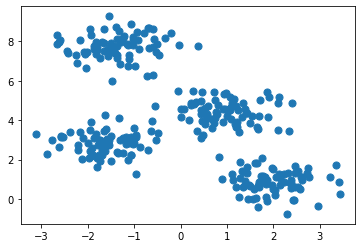

In [14]:
from sklearn.datasets.samples_generator import make_blobs
X,y_real = make_blobs(n_samples=300, centers = 4, cluster_std=0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1], s =50)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)

KMeans(n_clusters=4)

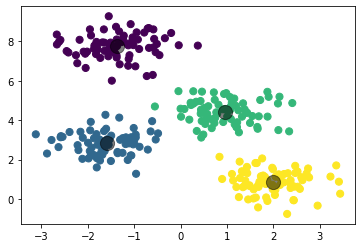

In [22]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], s =50,c=y_kmeans ,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black', s=200, alpha=0.5)

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise = .05, random_state = 0)
labels = KMeans(2, random_state=0).fit_predict(X)

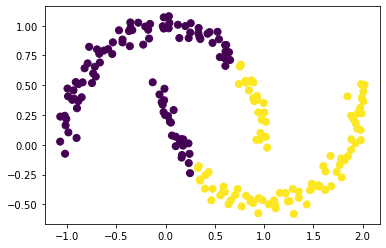

In [25]:
plt.scatter(X[:,0], X[:,1], s =50,c=labels ,cmap='viridis')

D:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


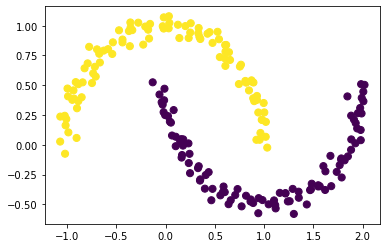

In [26]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                          assign_labels = 'kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], s =50,c=labels ,cmap='viridis')

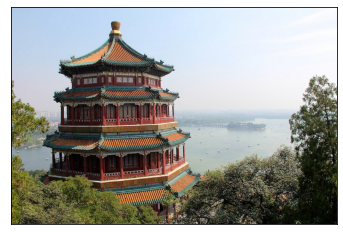

In [27]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [28]:
china.shape

(427, 640, 3)

In [29]:
data = china/255
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [30]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data) ## 16 bite çevirdik

MiniBatchKMeans(n_clusters=16)

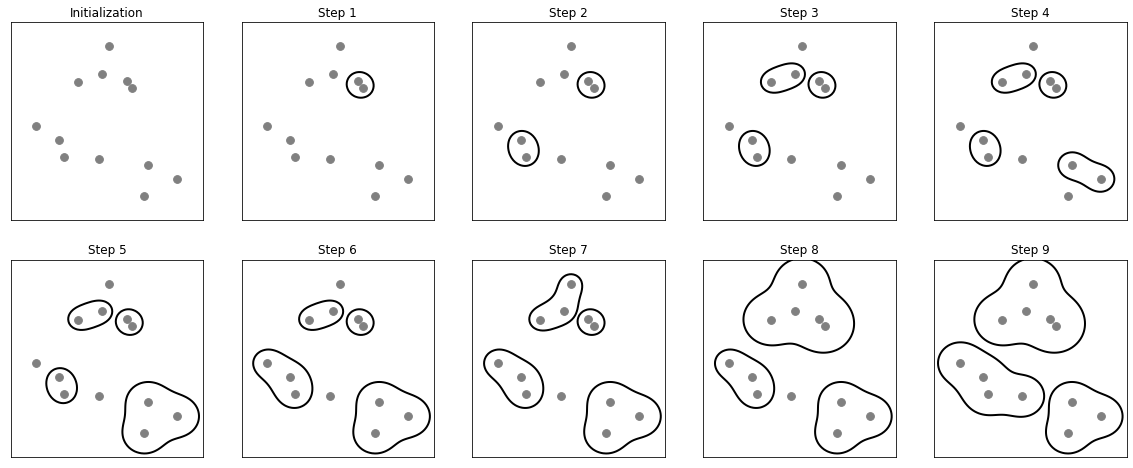

In [33]:
mglearn.plots.plot_agglomerative_algorithm()

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
agg = AgglomerativeClustering(n_clusters = 3)
k = agg.fit_predict(X)

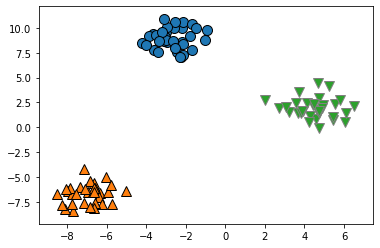

In [35]:
mglearn.discrete_scatter(X[:,0], X[:,1], k)

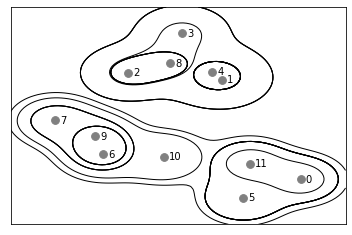

In [36]:
mglearn.plots.plot_agglomerative()

In [37]:
from scipy.cluster.hierarchy import dendrogram, ward

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125]],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.15

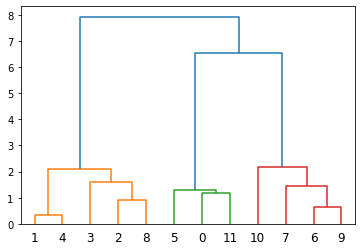

In [38]:
X,y = make_blobs(random_state =0, n_samples=12)
linkange_array = ward(X)
dendrogram(linkange_array)

In [39]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples = 12)
dbscan = DBSCAN()

In [40]:
clusters = dbscan.fit_predict(X)
clusters

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

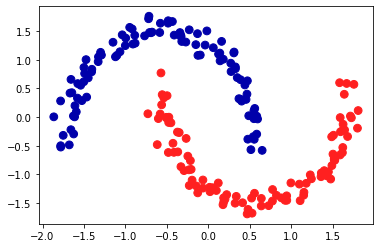

In [41]:
X,y = make_moons(n_samples=200, noise=0.06, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN() #shift tab
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c= clusters, cmap = mglearn.cm2, s = 60)

In [42]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples = 400, centers = 4, cluster_std = 0.60, random_state = 0)
X=X[:,::-1]

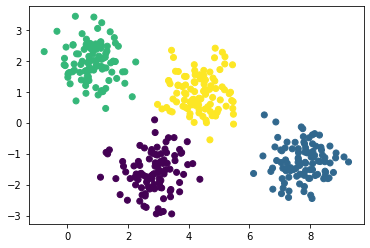

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state =0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')

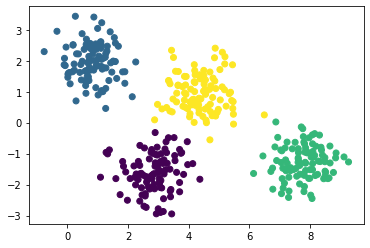

In [45]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')

In [46]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.469 0.531]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]]


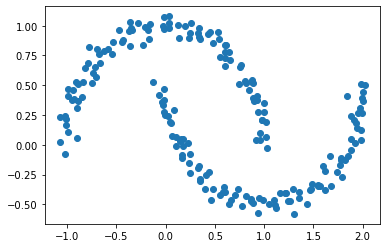

In [47]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(200, noise = 0.05, random_state=0)
plt.scatter(X_moons[:,0], X_moons[:,1])

In [48]:
gmm_2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)

In [50]:
gmm_16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)

In [51]:
import numpy as np

In [52]:
n_components = np.arange(1,21)

In [54]:
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_moons) for n in n_components]

Text(0.5, 0, 'n_components')

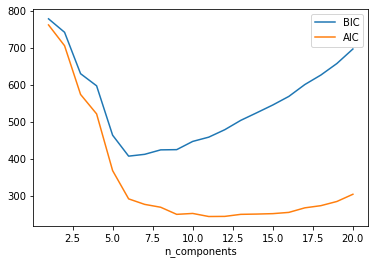

In [55]:
plt.plot(n_components, [m.bic(X_moons) for m in models], label ='BIC')
plt.plot(n_components, [m.aic(X_moons) for m in models], label ='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [56]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [57]:
from sklearn.decomposition import PCA
pca = PCA(.99, whiten=True)
data  = pca.fit_transform(digits.data)
data.shape

(1797, 41)

In [58]:
n_components = np.arange(50,210,10)
models = [GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]

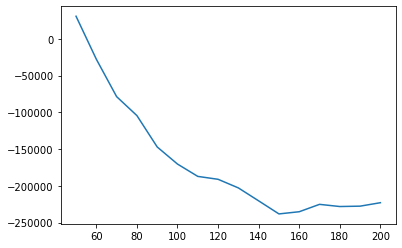

In [59]:
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [60]:
gmm = GaussianMixture(150, covariance_type = 'full', random_state=0).fit(data)
data_new = gmm.sample(100)

In [61]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 0)

In [62]:
X.shape

(150, 4)

In [63]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter =1000)
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9736842105263158

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(logreg, X, y, cv = 5)

In [69]:
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [70]:
scores.mean()

0.9733333333333334

In [72]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

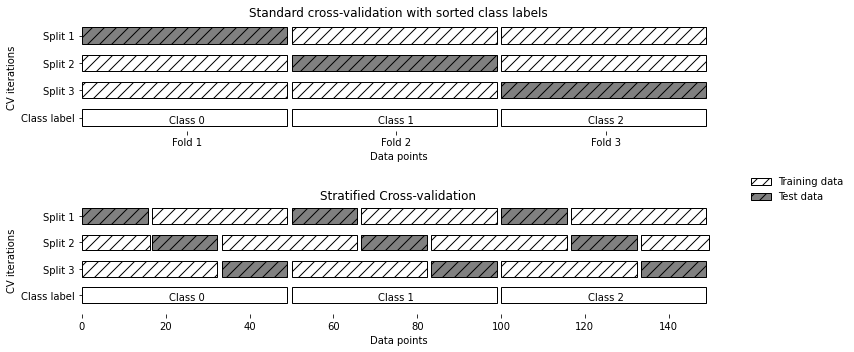

In [74]:
mglearn.plots.plot_stratified_cross_validation()

In [75]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)

In [77]:
cross_val_score(logreg, iris.data, iris.target, cv = kfold)

array([0.98, 0.96, 0.96])

In [80]:
from sklearn.model_selection import LeaveOneOut
loo= LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
scores.mean()

0.9666666666666667

In [83]:
from sklearn.model_selection import GroupKFold
X,y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X,y,groups, cv =GroupKFold(n_splits = 3))
scores

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([0.75      , 0.6       , 0.66666667])

In [84]:
from sklearn.datasets import load_digits

In [85]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [86]:
param_grid = [{'kernel':['rbf'],'gamma':[1e-3,1e-4],'C':[1,10,100,1000]},
             {'kernel':['linear'],'C':[1,10,100,1000]}]

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)

In [92]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [94]:
grid_search.score(X_test,y_test)

0.9933333333333333

In [96]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [98]:
grid_search.best_score_

0.9918353297535452

In [99]:
grid_search.best_estimator_

SVC(C=10, gamma=0.001)

In [100]:
grid_search.cv_results_

{'mean_fit_time': array([0.05894461, 0.05227814, 0.05484281, 0.02773142, 0.05683589,
        0.02633448, 0.05483265, 0.02541466, 0.01934614, 0.01873784,
        0.01822615, 0.01941133]),
 'std_fit_time': array([0.00214471, 0.00120598, 0.00227293, 0.00212812, 0.00372032,
        0.00050234, 0.00275611, 0.00132257, 0.00150811, 0.0007136 ,
        0.00040005, 0.00180989]),
 'mean_score_time': array([0.01252031, 0.01554923, 0.01137223, 0.00859046, 0.01098428,
        0.00818377, 0.01178737, 0.00839067, 0.00478048, 0.0053937 ,
        0.00518684, 0.00517135]),
 'std_score_time': array([5.49303512e-04, 1.86553354e-03, 4.92651842e-04, 1.02504371e-03,
        1.89734458e-05, 1.91772606e-03, 4.10692716e-04, 8.19461783e-04,
        3.77034915e-04, 4.66637979e-04, 3.64327162e-04, 3.84797731e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,

In [102]:
import pandas as pd

In [103]:
results = pd.DataFrame(grid_search.cv_results_)

In [104]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058945,0.002145,0.012520,0.000549,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.992593,0.992593,0.988848,0.985130,0.996283,0.991089,0.003795,4
1,0.052278,0.001206,0.015549,0.001866,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.966667,0.974074,0.962825,0.970260,0.981413,0.971048,0.006388,12
2,0.054843,0.002273,0.011372,0.000493,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
3,0.027731,0.002128,0.008590,0.001025,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985185,0.992593,0.981413,0.981413,0.996283,0.987377,0.006041,7
4,0.056836,0.003720,0.010984,0.000019,100,0.001,rbf,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
5,0.026334,0.000502,0.008184,0.001918,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985185,0.988889,0.981413,0.985130,1.000000,0.988123,0.006392,5
6,0.054833,0.002756,0.011787,0.000411,1000,0.001,rbf,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.988889,0.992593,0.992565,0.988848,0.996283,0.991835,0.002775,1
7,0.025415,0.001323,0.008391,0.000819,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.985185,0.988889,0.981413,0.985130,1.000000,0.988123,0.006392,5
8,0.019346,0.001508,0.004780,0.000377,1,NaN,linear,"{'C': 1, 'kernel': 'linear'}",0.981481,0.970370,0.977695,0.981413,0.996283,0.981448,0.008448,8
9,0.018738,0.000714,0.005394,0.000467,10,NaN,linear,"{'C': 10, 'kernel': 'linear'}",0.981481,0.970370,0.977695,0.981413,0.996283,0.981448,0.008448,8


In [105]:
results.T

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.0589446,0.0522781,0.0548428,0.0277314,0.0568359,0.0263345,0.0548326,0.0254147,0.0193461,0.0187378,0.0182261,0.0194113
std_fit_time,0.00214471,0.00120598,0.00227293,0.00212812,0.00372032,0.000502335,0.00275611,0.00132257,0.00150811,0.000713602,0.000400053,0.00180989
mean_score_time,0.0125203,0.0155492,0.0113722,0.00859046,0.0109843,0.00818377,0.0117874,0.00839067,0.00478048,0.0053937,0.00518684,0.00517135
std_score_time,0.000549304,0.00186553,0.000492652,0.00102504,1.89734e-05,0.00191773,0.000410693,0.000819462,0.000377035,0.000466638,0.000364327,0.000384798
param_C,1,1,10,10,100,100,1000,1000,1,10,100,1000
param_gamma,0.001,0.0001,0.001,0.0001,0.001,0.0001,0.001,0.0001,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear
params,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}","{'C': 1000, 'kernel': 'linear'}"
split0_test_score,0.992593,0.966667,0.988889,0.985185,0.988889,0.985185,0.988889,0.985185,0.981481,0.981481,0.981481,0.981481
split1_test_score,0.992593,0.974074,0.992593,0.992593,0.992593,0.988889,0.992593,0.988889,0.97037,0.97037,0.97037,0.97037


In [107]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), digits.data, digits.target, cv=5)
score

array([0.97777778, 0.95      , 0.98328691, 0.98607242, 0.9637883 ])

In [108]:
score.mean()

0.972185082017951